In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.data import conex_file_parser
from src.profile_functions import anormal, gaisser_hillas, gaisser_hillas_six, usp
from src.util import get_fit

sns.set_style('darkgrid')

Welcome to JupyROOT 6.26/10


### Load a single profile

In [2]:
input_files = '../data/conex/p_17-20eV_60deg/sibyll23d/*.root'
parser = conex_file_parser(input_files, ['Xdep', 'dEdX'], 1)
x, y = next(parser)

### Helper function to get fit and draw

In [3]:
def fit_and_draw(f, x, y):
  sig = 1e-2 * np.sqrt(y * np.sum(y))
  msk = sig/y <= 0.3
  
  popt, perr, stat, chi2 = get_fit(f, x[msk], y[msk], sig[msk])

  plt.fill_between(x, y, color = 'navy', alpha = 0.5, lw = 0)
  plt.plot(x[msk], f(x[msk], *popt), '-', color = 'navy', alpha = 0.7, lw = 2)
  plt.xlabel('Slant atmospheric depth [g cm$^{-2}$]')
  plt.ylabel('d$E/$d$X$ [GeV g$^{-1}$ cm$^2$]')
  plt.show()

  print('parameters: ', popt)
  print('errors: ', perr)
  print('status: ', stat)
  print('chi2: ', chi2)

### USP function

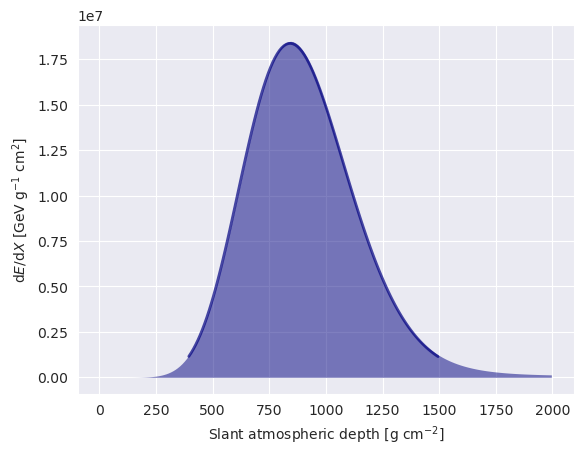

parameters:  [1.83782148e+07 8.42320233e+02 2.31301287e+02 2.39533671e-01]
errors:  [2.12097844e+04 4.11532914e-01 1.89008229e-01 2.01358451e-03]
status:  True
chi2:  0.84202385


In [4]:
fit_and_draw(usp, x, y)

### Asymetric gaussial profile

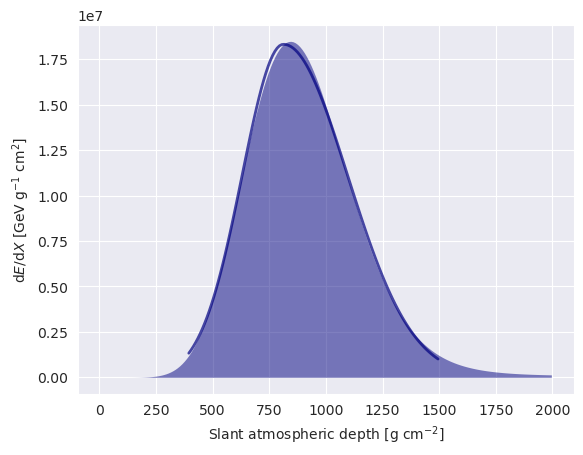

parameters:  [1.83263411e+07 8.12562752e+02 1.82209190e+02 2.83332080e+02]
errors:  [5.87467555e+04 1.79461687e+00 1.27594428e+00 1.34788813e+00]
status:  True
chi2:  6.50158408894824


In [5]:
fit_and_draw(anormal, x, y)

### Usual Gaisser-Hillas function

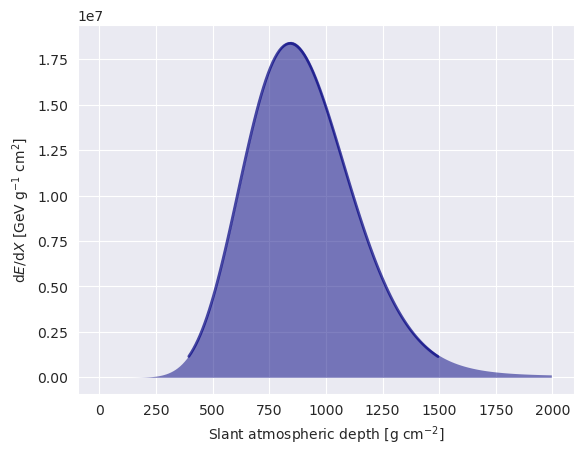

parameters:  [ 1.83782149e+07  8.42320232e+02 -1.23311380e+02  5.54044467e+01]
errors:  [2.12097847e+04 4.11532997e-01 7.82057881e+00 4.67230441e-01]
status:  True
chi2:  0.8420261


In [6]:
fit_and_draw(gaisser_hillas, x, y)

### 6-parameter Gaisser-Hillas function

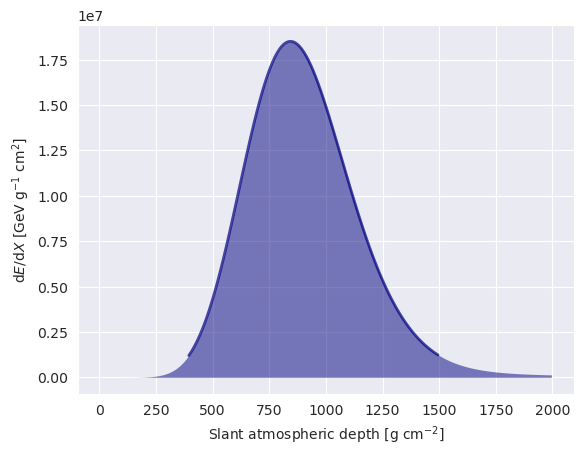

parameters:  [ 1.85031598e+07  8.43804683e+02 -4.99335642e+01  7.41117392e+01
 -3.20523806e-02  1.50184541e-05]
errors:  [2.52523813e+03 6.23650650e-02 6.61071183e+00 1.15986485e+00
 1.24120906e-03 4.52143219e-07]
status:  True
chi2:  0.008172481


In [7]:
fit_and_draw(gaisser_hillas_six, x, y)